In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('../../Data/placement.csv')

In [6]:
df.sample(4)

,cgpa,package
46,6.07,2.26
167,8.13,3.60
115,8.35,4.21
187,6.26,2.44


Text(0, 0.5, 'Package')

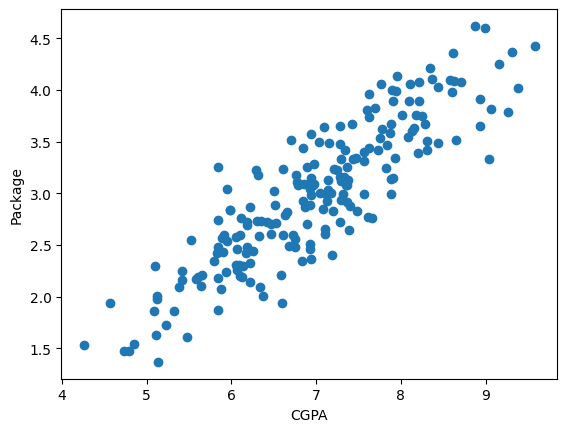

In [8]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [9]:
X = df.iloc[:, 0:1]
Y = df.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, Y_train)

LinearRegression()

Text(0, 0.5, 'Package')

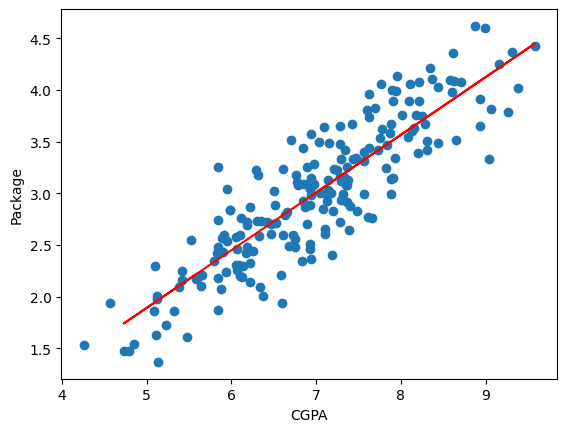

In [19]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [22]:
y_pred = lr.predict(X_test)

In [24]:
Y_test.values

array([2.59, 1.94, 3.89, 2.4 , 3.99, 3.62, 2.6 , 4.62, 2.99, 3.09, 3.54,
       3.5 , 4.37, 3.24, 3.26, 2.61, 3.49, 2.09, 3.12, 2.99, 2.43, 1.86,
       2.01, 1.63, 2.46, 4.08, 4.08, 2.79, 2.21, 1.53, 4.  , 3.03, 2.74,
       3.15, 3.76, 3.55, 3.33, 2.87, 2.77, 2.09])

In [25]:
print("Mae", mean_absolute_error(Y_test, y_pred))

Mae 0.2570677875177574


In [26]:
print("Mse", mean_squared_error(Y_test, y_pred))

Mse 0.10910575585573082


In [27]:
print("RMse", np.sqrt(mean_squared_error(Y_test, y_pred)))

Mse 0.10910575585573082


In [30]:
print("R2", r2_score(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

R2 0.8126127333008129


In [31]:
X_test.shape

(40, 1)

In [32]:
# Adjusted R2 
ad_R2 = 1 - ((1 -r2) * (40-1)/ (40-1-1))

In [33]:
ad_R2

0.8076814894403079